In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('USA_Housing.csv')
df = data.copy()

In [4]:
pd.options.display.float_format = '{:.6f}'.format
pd.set_option('display.max_columns', None)

In [5]:
df.drop('Address', axis = 1, inplace = True)

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.090000,23086.800503,1059033.557870
1,79248.642455,6.002900,6.730821,3.090000,40173.072174,1505890.914847
2,61287.067179,5.865890,8.512727,5.130000,36882.159400,1058987.987876
3,63345.240046,7.188236,5.586729,3.260000,34310.242831,1260616.806629
4,59982.197226,5.040555,7.839388,4.230000,26354.109472,630943.489339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [8]:
# %pip install pandas-profiling

In [9]:
import pandas_profiling as pp

In [10]:
df.profile_report(title = 'USA Housing Data Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

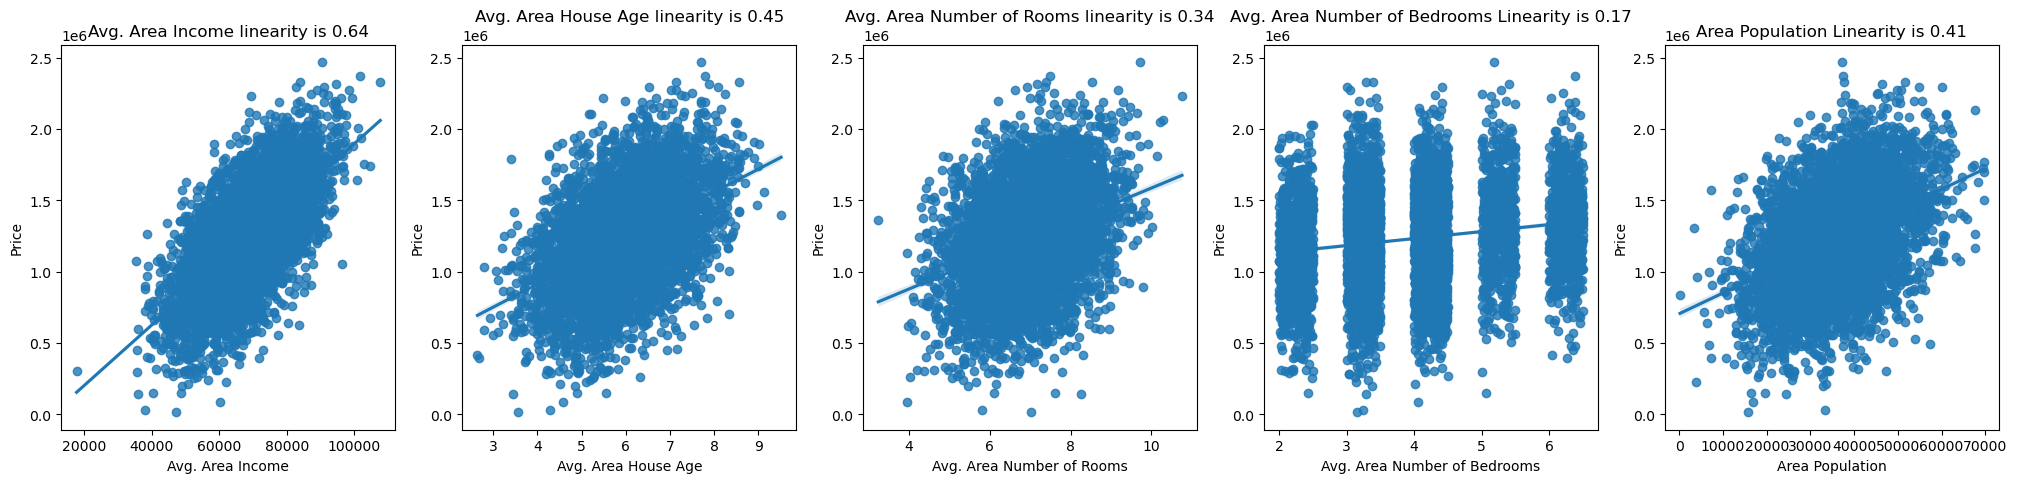

In [12]:
#..........CHECK FOR LINEARITY
def linearcheck (dataframe, a, b , c, d, e, f):
    plt.figure(figsize = (25, 5))
    
    plt.subplot(1,5,1)
    sns.regplot(x = dataframe[a], y = dataframe[f], ci = 0)
    plt.title(f"{a} linearity is {df[a].corr(dataframe[f]) :.2f}")
    
    plt.subplot(1,5,2)
    sns.regplot(x = dataframe[b], y = dataframe[f])
    plt.title(f"{b} linearity is {df[b].corr(dataframe[f]) :.2f}")
    
    plt.subplot(1,5,3)
    sns.regplot(x = dataframe[c], y = dataframe[f])
    plt.title(f"{c} linearity is {df[c].corr(dataframe[f]) :.2f}")
    
    plt.subplot(1,5,4)
    sns.regplot(x = dataframe[d], y = dataframe[f])
    plt.title(f"{d} Linearity is {dataframe[d].corr(dataframe[f]):.2f}")
    
    plt.subplot(1,5,5)
    sns.regplot(x = dataframe[e], y = dataframe[f])
    plt.title(f"{e} Linearity is {dataframe[e].corr(dataframe[f]) :.2f}")
    
linearcheck(df, 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price')

In [13]:
print(f"{df['Avg. Area Income'].corr(df['Price']) :.3f}")

0.640


In [14]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1232072.654142
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,353117.626581
min,17796.631190,2.644304,3.236194,2.000000,172.610686,15938.657923
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,997577.135049
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1232669.377966
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1471210.204212
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2469065.594175


In [15]:
#...........NORMALIZATION
no_price = df.drop('Price', axis = 1)
normalize = MinMaxScaler()
for i in df.columns:
    if i in no_price:
        df[i] = normalize.fit_transform(df[[i]])

In [16]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.564890,0.484803,0.498658,0.440296,0.518234,1232072.654142
std,0.118547,0.144216,0.133694,0.274253,0.142920,353117.626581
min,0.000000,0.000000,0.000000,0.000000,0.000000,15938.657923
25%,0.485889,0.389536,0.407138,0.253333,0.420903,997577.135049
50%,0.567350,0.483815,0.500666,0.455556,0.518751,1232669.377966
75%,0.644977,0.582783,0.588787,0.553333,0.614676,1471210.204212
max,1.000000,1.000000,1.000000,1.000000,1.000000,2469065.594175


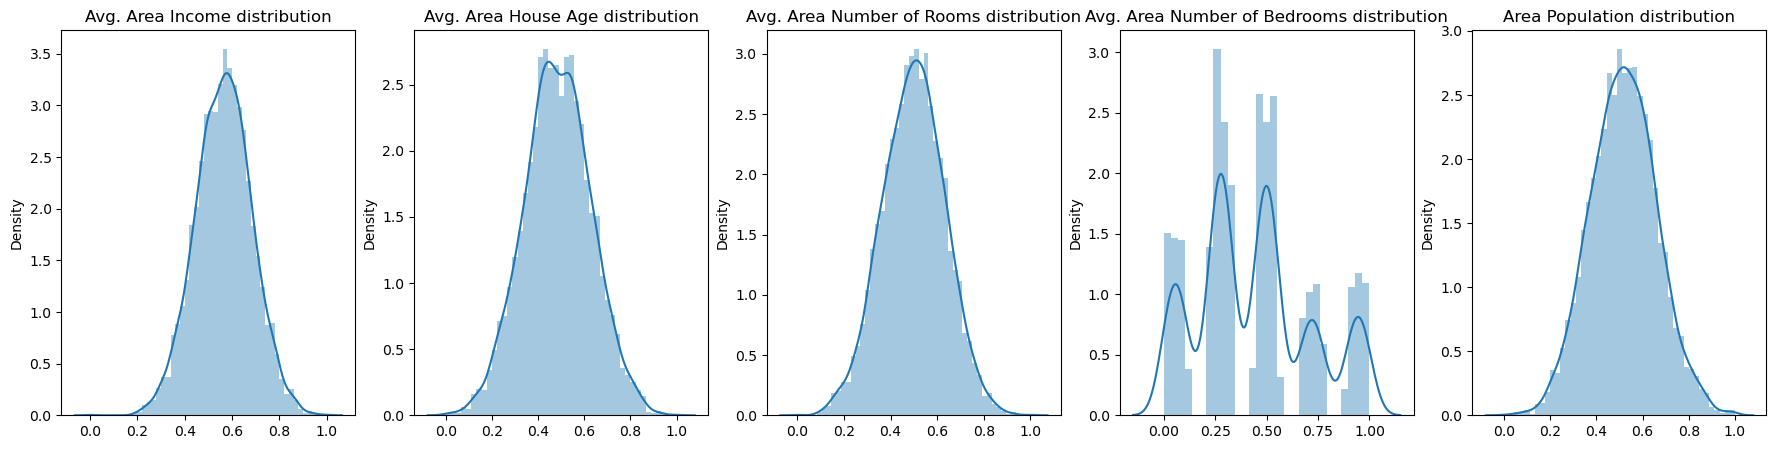

In [17]:
#......CHECK IF NORMALLY DISTRIBUTED
def normalityChecker(dataframe, a,b,c, d, e):
    plt.figure(figsize = (22, 5))

    plt.subplot(1, 5, 1)
    sns.distplot(x = dataframe[a])
    plt.title(f"{a} distribution")

    plt.subplot(1, 5, 2)
    sns.distplot(x = dataframe[b])
    plt.title(f"{b} distribution")

    plt.subplot(1, 5, 3)
    sns.distplot(x = dataframe[c])
    plt.title(f"{c} distribution")
    
    plt.subplot(1, 5, 4)
    sns.distplot(x = dataframe[d])
    plt.title(f"{d} distribution")
    
    plt.subplot(1, 5, 5)
    sns.distplot(x = dataframe[e])
    plt.title(f"{e} distribution")

    
normalityChecker(df, 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population')

<Axes: >

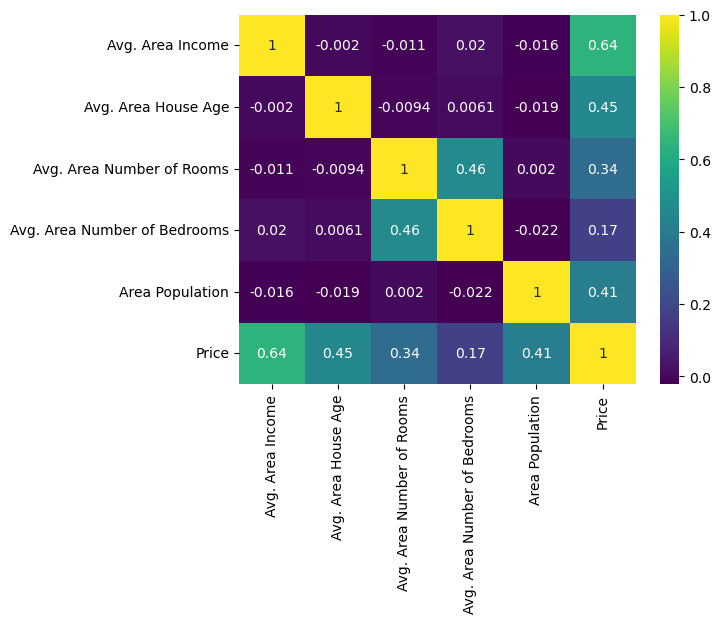

In [18]:
#..............CHECK FOR MULTICOLLINEARITY
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [19]:
feature = df.drop('Avg. Area Number of Bedrooms', axis = 1)

In [20]:
feature

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.329942,1059033.557870
1,0.683521,0.488538,0.464501,0.575968,1505890.914847
2,0.483737,0.468609,0.701350,0.528582,1058987.987876
3,0.506630,0.660956,0.312430,0.491549,1260616.806629
4,0.469223,0.348556,0.611851,0.376988,630943.489339
...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.326351,1060193.785885
4996,0.675097,0.633450,0.444024,0.366362,1482617.728622
4997,0.507135,0.670026,0.208534,0.476515,1030729.583152
4998,0.558419,0.420389,0.517579,0.611282,1198656.872408


In [21]:
#Split to train and test
x = feature.drop('Price', axis = 1)
y = feature.Price

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.15, random_state = 40)

In [22]:
#.............VIEW SIZE........
print(f"The size of ytrain is: {ytrain.shape}")
print(f"The size of xtrain is: {xtrain.shape}")
print(f"The size of xtest is: {xtest.shape}")
print(f"The size of ytest is: {ytest.shape}")

The size of ytrain is: (4250,)
The size of xtrain is: (4250, 4)
The size of xtest is: (750, 4)
The size of ytest is: (750,)


In [23]:
#............VIEW DATASET
train_set = pd.concat([xtrain, ytrain], axis = 1).reset_index(drop = True)
test_set = pd.concat([xtest, ytest], axis = 1).reset_index(drop = True)

print("\t\t\t\t\t TRAIN SET")
display(train_set)
print(f"\t\t {train_set.shape}\n\n")

print("\t\t\t\t\t TEST SET")
display(test_set)
print(f"\t\t {test_set.shape}")

					 TRAIN SET


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,0.663867,0.442769,0.429010,0.440077,1153680.146028
1,0.584314,0.486485,0.678807,0.689781,1712282.259363
2,0.320615,0.646843,0.670495,0.736489,1266747.829537
3,0.606430,0.514375,0.403871,0.629797,1311389.575828
4,0.475016,0.570375,0.556435,0.705306,1431517.357680
...,...,...,...,...,...
4245,0.465143,0.838517,0.398478,0.460646,1259190.706203
4246,0.646018,0.250308,0.407639,0.517595,1236308.279945
4247,0.700862,0.531255,0.342988,0.608119,1304284.226006
4248,0.850287,0.735572,0.642707,0.561087,2180065.597739


		 (4250, 5)


					 TEST SET


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,0.640620,0.558575,0.354569,0.621843,1435769.768837
1,0.756970,0.433577,0.545935,0.475567,1668448.098057
2,0.642246,0.756520,0.574138,0.469489,1762214.679582
3,0.505389,0.331049,0.437552,0.706990,1106261.273705
4,0.441582,0.586166,0.570002,0.619613,1051123.833100
...,...,...,...,...,...
745,0.754932,0.391017,0.588979,0.347018,1218125.212270
746,0.489779,0.502628,0.439609,0.540191,1054856.032667
747,0.653471,0.265576,0.404106,0.671972,1104115.692784
748,0.627960,0.256097,0.271704,0.644602,1039794.767448


		 (750, 5)


In [30]:
#..............MODELLING
# from sklearn.ensemble import RandomForestRegressor
house = LinearRegression()
house.fit(xtrain, ytrain)
ytrain_predict = house.predict(xtrain)
train_score = r2(ytrain_predict, ytrain)

'''test set'''
ytest_predict = house.predict(xtest)
test_score = r2(ytest_predict, ytest)

In [31]:
#...........Print Cross valiation score
print(f"The accuracy score of Train set is: {train_score * 100 :.1f}%")
print(f"The accuracy score of Test set is: {test_score * 100 :.1f}%")

The accuracy score of Train set is: 91.1%
The accuracy score of Test set is: 90.7%


In [32]:
#..........print difference
difference = pd.DataFrame({"Actual Value": ytest, "Predicted Value": ytest_predict, "difference": abs(ytest_predict - ytest)}).reset_index(drop = True)
difference

,Actual Value,Predicted Value,difference
0,1435769.768837,1439255.346613,3485.577776
1,1668448.098057,1542409.985695,126038.112362
2,1762214.679582,1708824.734420,53389.945161
3,1106261.273705,1083859.073560,22402.200145
4,1051123.833100,1280971.693280,229847.860180
...,...,...,...
745,1218125.212270,1393663.201027,175537.988757
746,1054856.032667,1075501.980446,20645.947779
747,1104115.692784,1227782.152135,123666.459352
748,1039794.767448,1017472.131453,22322.635994


In [27]:
#COEFFICIENT OF COLUMNS
for i in x:
    col_index = x.columns.get_loc(i)
    coefficient = house.coef_[col_index]
    print(f"The coefficient of {col_index} is: {coefficient :.3f}\n")
   
#INTECRPT OF PRICE 
print(f"The intercept of Price is: {house.intercept_ :.3f}")

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

Text(0.5, 1.0, 'Homoscedasticity Of Actual And Predicted Price')

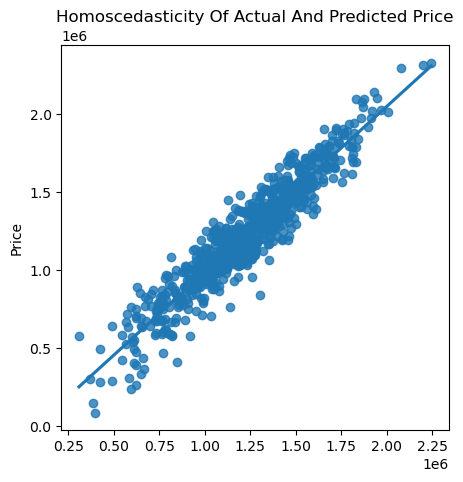

In [28]:
#......CHECK FOR HOMOSCEDASTICITY
plt.figure(figsize = (5,5))
sns.regplot(x = ytest_predict, y = ytest, ci = 0)
plt.title('Homoscedasticity Of Actual And Predicted Price')

Text(0.5, 1.0, 'Normal distribution of residuals')

<Figure size 500x500 with 0 Axes>

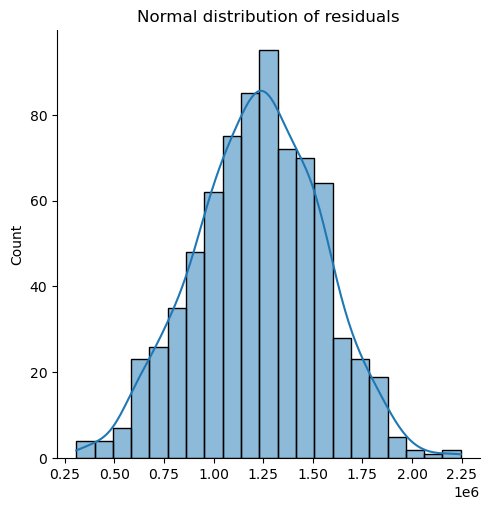

In [29]:
#ASSUMPTION OF NORMAL DISTRIBUTION OF RESIDUAL
plt.figure(figsize = (5,5))
sns.displot(x = ytest_predict, kde = True)
plt.title('Normal distribution of residuals')

In [33]:
import joblib
joblib.dump(house, 'house.pkl')

['house.pkl']